In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

In [2]:
size_scale = 0.7
FIGSIZE = (14 * size_scale, 8 * size_scale)

In [3]:
df_pop = pd.read_csv('..//data//FOLK1A_women.csv', encoding='latin-1', sep=';', header=None)
df_pop.columns = ['type', 'sex', 'county', 'age_text', 'number']

In [4]:
df_pop['age'] = df_pop['age_text'].apply(lambda x: int(x.split(' ')[0]))

In [5]:
df_pop

,type,sex,county,age_text,number,age
0,I alt,Kvinder,Hele landet,18 år,33875,18
1,I alt,Kvinder,Hele landet,19 år,34535,19
2,I alt,Kvinder,Hele landet,20 år,35563,20
3,I alt,Kvinder,Hele landet,21 år,36041,21
4,I alt,Kvinder,Hele landet,22 år,37942,22
5,I alt,Kvinder,Hele landet,23 år,38467,23
6,I alt,Kvinder,Hele landet,24 år,40324,24
7,I alt,Kvinder,Hele landet,25 år,39724,25
8,I alt,Kvinder,Hele landet,26 år,39731,26
9,I alt,Kvinder,Hele landet,27 år,38942,27


In [6]:
df_educ = pd.read_csv('..//data//UDDAKT10_women.csv', encoding='latin-1', sep=';', header=None)
df_educ.columns = ['type', 'sex', 'county', 'age_text', 'number']

In [7]:
df_educ['age'] = df_educ['age_text'].apply(lambda x: int(x.split(' ')[0]))

In [8]:
df_educ

,type,sex,county,age_text,number,age
0,Elever pr. 1. oktober,Kvinder,Hele landet,18 år,27022,18
1,Elever pr. 1. oktober,Kvinder,Hele landet,19 år,16368,19
2,Elever pr. 1. oktober,Kvinder,Hele landet,20 år,13426,20
3,Elever pr. 1. oktober,Kvinder,Hele landet,21 år,19167,21
4,Elever pr. 1. oktober,Kvinder,Hele landet,22 år,24298,22
5,Elever pr. 1. oktober,Kvinder,Hele landet,23 år,23609,23
6,Elever pr. 1. oktober,Kvinder,Hele landet,24 år,21685,24
7,Elever pr. 1. oktober,Kvinder,Hele landet,25 år,16492,25
8,Elever pr. 1. oktober,Kvinder,Hele landet,26 år,11891,26
9,Elever pr. 1. oktober,Kvinder,Hele landet,27 år,8578,27


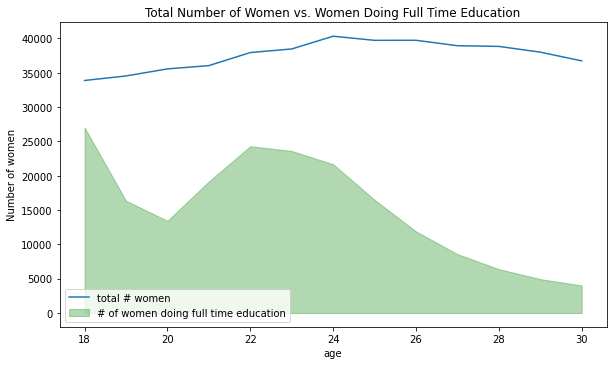

In [9]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)

ax.plot(df_pop['age'], df_pop['number'], label='total # women')
ax.fill_between(df_educ['age'], df_educ['number'], color='green', \
                alpha=0.3, label='# of women doing full time education')

ax.set_xlabel('age')
ax.set_ylabel('Number of women')
ax.set_title("Total Number of Women vs. Women Doing Full Time Education")
ax.legend()
f.savefig('..//figures//total_women_vs_education.png')

In [10]:
from scipy.stats import linregress

In [11]:
linregress(df_pop['age'], df_educ['number'] / df_pop['number'] )

LinregressResult(slope=-0.04680282484570767, intercept=1.53183678448833, rvalue=-0.8448133189043763, pvalue=0.00027825691625536075, stderr=0.008937548404238386)

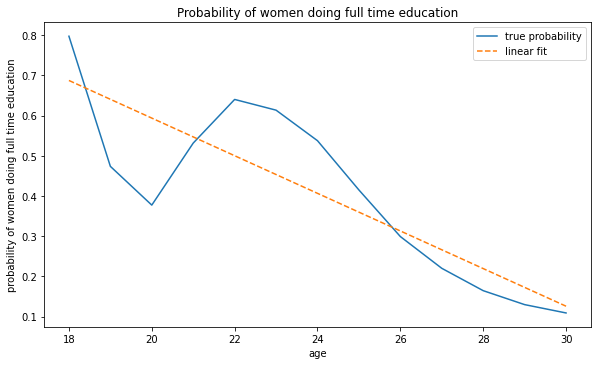

In [12]:
f , ax = plt.subplots(1,1, figsize=FIGSIZE)
ax.plot(df_pop['age'], df_educ['number'] / df_pop['number'], label='true probability')
ax.plot(np.linspace(18, 30), 1.53 - 0.0468 * np.linspace(18,30), ls='--', label='linear fit')
ax.set_xlabel('age')
ax.set_ylabel('probability of women doing full time education')
ax.set_title("Probability of women doing full time education")
ax.legend()

f.savefig('..//figures//prop_women_doing_full_time_education.png')


In [13]:
class EducationSimulator():
    
    def __init__(self):
        self.start_age = 18
        self.end_age = 30
        self.age_prop = dict()
        self.true_prop = np.array(range(31)) * -0.0468 + 1.53
        self.N = 5000
            
    def dropout_prop(self, age):
        return self.age_prop[age]
    
    @staticmethod
    def calc_age_prop(prop, true_prop, agents):
        #print('prop',prop)
        agents_ = list()
        for agent in agents:
            if agent == 1:
                agent = agent - np.random.binomial(1, 1 - prop)
            agents_.append(agent)
        return (np.mean(agents_) - true_prop)**2
    
    def solve_for_age(self, age):
        agents = list(1 for _ in range(self.N))
        np.random.seed(30)
        
        agents_ = list()
        for agent in agents:
            agent = agent - np.random.binomial(1, 1 - self.true_prop[age])
            agents_.append(agent)
            
        obj = lambda x: self.calc_age_prop(x, self.true_prop[age+1], agents_)
        
        res = minimize_scalar(obj,bounds =(0.0 ,1.0), method='bounded')
        self.age_prop[age] = res.x
        
    def solve(self):
        for age in range(18, 30):
            self.solve_for_age(age)
            
    def calc_dropout(self, age, educ_frac):
        return educ_frac * self.age_prop[age]
        

In [14]:
es = EducationSimulator()

In [15]:
es.solve()

In [16]:
es.age_prop

{18: 0.925953150421135,
 19: 0.9381269068436727,
 20: 0.9397936635431667,
 21: 0.9310792957278888,
 22: 0.9262398498511186,
 23: 0.8825394357268251,
 24: 0.8772451905397338,
 25: 0.8527012756128901,
 26: 0.8583122798308329,
 27: 0.8137356935331768,
 28: 0.7558014037444268,
 29: 0.748563830778672}

In [17]:
x = range(18,30)
y_true = list(map(lambda _x: 1.53 - 0.0468 * _x, x))

In [18]:
y_true

[0.6876,
 0.6408,
 0.594,
 0.5472,
 0.5004,
 0.4536,
 0.40680000000000005,
 0.3600000000000001,
 0.3131999999999999,
 0.26639999999999997,
 0.21960000000000002,
 0.17280000000000006]

In [19]:
x

range(18, 30)

In [20]:

y_pred = [y_true[0]]
for _x in x[0:-1]:
    y_pred.append(es.calc_dropout(_x, y_pred[-1]))

In [21]:
y_pred

[0.6876,
 0.6366853862295724,
 0.5972916920161179,
 0.5613309474437242,
 0.5226436232161713,
 0.48409335109339113,
 0.42723147291306923,
 0.3747867548601965,
 0.31958114395210513,
 0.27430042025647694,
 0.22320804271384612,
 0.16870095201017088]

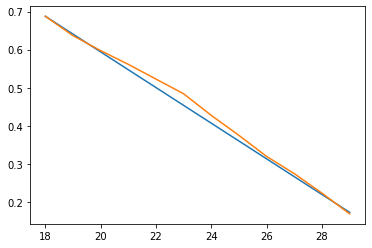

In [22]:
plt.plot(x, y_true)
plt.plot(x, y_pred)

In [23]:
df_res = pd.DataFrame(y_true, index=x, columns =['y_true'])

In [24]:
df_res['dropout_prop'] = list(es.age_prop.values())

In [25]:
df_res

,y_true,dropout_prop
18,0.6876,0.925953
19,0.6408,0.938127
20,0.5940,0.939794
21,0.5472,0.931079
22,0.5004,0.926240
23,0.4536,0.882539
24,0.4068,0.877245
25,0.3600,0.852701
26,0.3132,0.858312
27,0.2664,0.813736


In [26]:
df_res['y_true'] * df_res['dropout_prop']

18    0.636685
19    0.601152
20    0.558237
21    0.509487
22    0.463490
23    0.400320
24    0.356863
25    0.306972
26    0.268823
27    0.216779
28    0.165974
29    0.129352
dtype: float64

In [27]:
df_res.to_pickle('..//data//dropout_prop.pkl')